In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import pandas_datareader.data as web
import datetime

In [2]:
import qeds
qeds.themes.mpl_style();
colors=plt.rcParams["axes.prop_cycle"].by_key()["color"]
colors.remove('#fec630')
sns.set_style('whitegrid')

In [3]:
lfpr = pd.read_csv('./lfpr.csv',skiprows=4)
id_cols = lfpr.columns.values[:4]
value_cols = lfpr.columns.values[4:]
lfpr=lfpr.melt(id_vars=id_cols,value_vars=value_cols,var_name='year',value_name='LFPR')
lfpr.dropna(inplace=True)
lfpr['year'] = lfpr.year.astype(int)



In [4]:
ur = pd.read_csv('./ur.csv',skiprows=4)
id_cols = ur.columns.values[:4]
value_cols = ur.columns.values[4:]
ur=ur.melt(id_vars=id_cols,value_vars=value_cols,var_name='year',value_name='UR')
ur.dropna(inplace=True)
ur['year'] = ur.year.astype(int)


In [5]:
epop = pd.read_csv('./epop.csv',skiprows=4)
id_cols = epop.columns.values[:4]
value_cols = epop.columns.values[4:]
epop=epop.melt(id_vars=id_cols,value_vars=value_cols,var_name='year',value_name='E/pop')
epop.dropna(inplace=True)
epop['year'] = epop.year.astype(int)


In [6]:
countries_pick = ['NOR','ESP','CHN','IND','FRA','GBR'] # 'USA'

In [7]:
lfpr.head()

,Country Name,Country Code,Indicator Name,Indicator Code,year,LFPR
7921,Afghanistan,AFG,"Labor force participation rate, total (% of to...",SL.TLF.CACT.ZS,1990,63.393002
7922,Angola,AGO,"Labor force participation rate, total (% of to...",SL.TLF.CACT.ZS,1990,78.011002
7923,Albania,ALB,"Labor force participation rate, total (% of to...",SL.TLF.CACT.ZS,1990,64.393997
7925,Arab World,ARB,"Labor force participation rate, total (% of to...",SL.TLF.CACT.ZS,1990,48.278217
7926,United Arab Emirates,ARE,"Labor force participation rate, total (% of to...",SL.TLF.CACT.ZS,1990,72.870003


In [8]:
lfpr_pick = lfpr[lfpr['Country Code'].isin(countries_pick)]

In [9]:
pal = dict(zip(countries_pick,colors))

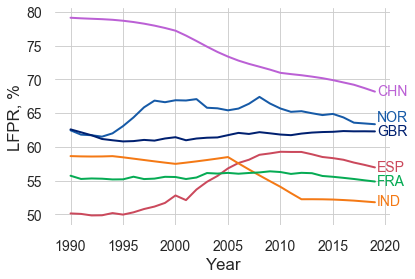

In [105]:
fig,ax = plt.subplots()
for country in countries_pick:
    data = lfpr[lfpr['Country Code']==country]
    ax.plot(data.year,data.LFPR,pal[country],linewidth=2,label=country)
    if (country != 'USA') & (country != 'NOR'):  
        ax.annotate(country,(2019.2,data[data.year==2019].LFPR-.5),color=pal[country])
    elif country == 'USA':
        ax.annotate(country,(2019.2,data[data.year==2019].LFPR-2),color=pal[country])
    elif country == 'NOR':
        ax.annotate(country,(2019.2,data[data.year==2019].LFPR+.5),color=pal[country])

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('Year')
ax.set_ylabel('LFPR, %')
plt.savefig('./lfpr.svg',bbox_inches='tight')

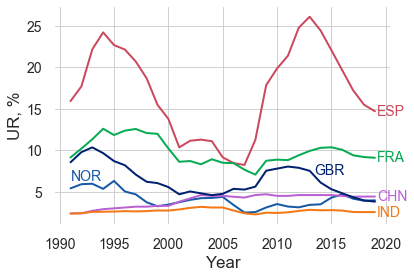

In [106]:
fig,ax = plt.subplots()
for country in countries_pick:
    data = ur[ur['Country Code']==country]
    ax.plot(data.year,data.UR,pal[country],linewidth=2)
    if country == 'GBR':
        ax.annotate(country,(2013.4,data[data.year==2013].UR-.5),color=pal[country])
    elif country == 'NOR':
        ax.annotate(country,(1991,data[data.year==1991].UR+.9),color=pal[country])        
    else:
        ax.annotate(country,(2019.2,data[data.year==2019].UR-.5),color=pal[country])

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('Year')
ax.set_ylabel('UR, %')
plt.savefig('./ur.svg',bbox_inches='tight')

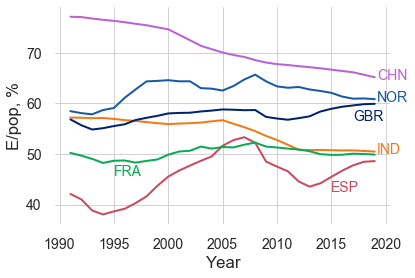

In [107]:
fig,ax = plt.subplots()
for country in countries_pick:
    data = epop[epop['Country Code']==country]
    ax.plot(data.year,data['E/pop'],pal[country],linewidth=2)
    if country == 'GBR':
        ax.annotate(country,(2017,data[data.year==2017]['E/pop']-3),color=pal[country])
    elif country == 'ESP':
        ax.annotate(country,(2015,data[data.year==2015]['E/pop']-3),color=pal[country])   
    elif country == 'FRA':
        ax.annotate(country,(1995,data[data.year==1995]['E/pop']-3),color=pal[country])  
    else:
        ax.annotate(country,(2019.2,data[data.year==2019]['E/pop']-.5),color=pal[country])

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('Year')
ax.set_ylabel('E/pop, %')
plt.savefig('./epop.svg',bbox_inches='tight')

In [10]:
lfpr.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)

In [11]:
ur.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)

In [12]:
epop.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)

In [13]:
df = lfpr.merge(ur,on=['Country Name','Country Code','year']).merge(epop,on=['Country Name','Country Code','year'])

In [14]:
df['E/pop']=df['E/pop'].round(decimals=2)

In [15]:
locs = {'CHN':(5,75),
       'NOR':(5,65),
       'GBR':(8,63),
       'IND':(3,55),
       'FRA':(6,53),
       'ESP':(20,55)}

In [18]:
df[df.year==1991]

,Country Name,Country Code,year,LFPR,UR,E/pop
0,Afghanistan,AFG,1991,63.433998,2.976000,61.55
1,Angola,AGO,1991,78.002998,22.601999,60.37
2,Albania,ALB,1991,65.903999,16.781000,54.85
3,Arab World,ARB,1991,48.304310,11.635213,42.68
4,United Arab Emirates,ARE,1991,73.114998,1.632000,71.92
5,Argentina,ARG,1991,59.730999,5.440000,56.48
6,Armenia,ARM,1991,59.109001,1.600000,58.16
7,Australia,AUS,1991,63.269001,9.579000,57.21
8,Austria,AUT,1991,56.169998,3.420000,54.25
9,Azerbaijan,AZE,1991,60.569000,0.900000,60.02


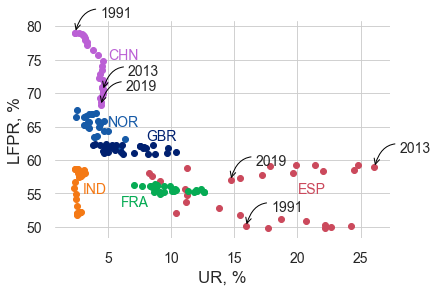

In [33]:
fig, ax = plt.subplots()
for country in countries_pick:
    data = df[df['Country Code']==country]
    ax.scatter(data.UR,data.LFPR,color=pal[country])
    loc_ = locs[country]
    loc_2 = data[data.year == 1991][['UR','LFPR']].values[0]
    ax.annotate(country,loc_,color=pal[country])
    if country in ['CHN','ESP']:
        for year_ in [1991,2013,2019]:
            loc_2 = data[data.year == year_][['UR','LFPR']].values[0]
            ax.annotate(
            year_, xy=loc_2, xycoords="data",
            xytext=(25, 15), textcoords="offset points",
            arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('UR, %')
ax.set_ylabel('LFPR, %')
plt.savefig('./lfpr_ur.svg',bbox_inches='tight')

In [134]:
import plotly_express as px
import plotly as py
py.offline.init_notebook_mode(connected=True)

In [135]:
df.head()

,Country Name,Country Code,year,LFPR,UR,E/pop
0,Afghanistan,AFG,1991,63.433998,2.976000,61.546001
1,Angola,AGO,1991,78.002998,22.601999,60.372002
2,Albania,ALB,1991,65.903999,16.781000,54.845001
3,Arab World,ARB,1991,48.304310,11.635213,42.683929
4,United Arab Emirates,ARE,1991,73.114998,1.632000,71.921997


In [169]:
fig = px.scatter(df[df['Country Code'].isin(countries_pick)],x='UR',y='LFPR',color='Country Code',
           color_discrete_map=pal,template='plotly_white',size='E/pop',size_max=12,
           hover_name='Country Name',hover_data=['year','E/pop'],height=500)

In [170]:
fig.for_each_trace(
    lambda trace: trace.update(name=trace.name.replace("Country Code=", "")))

In [171]:
py.offline.plot(fig, filename='lfpr_ur.html')

'lfpr_ur.html'